In [98]:
# Model definition
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Define paths to the data folders
data_path = 'DataNew4'

# Define data generator parameters
batch_size = 32
target_size = (48, 48)  # Adjust as per your requirements

# Create a data generator with train-validation split
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.5,
    zoom_range=0.05,
    horizontal_flip=True,
    rescale=1/255,
    validation_split=0.2
)


# Generate the train data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
     color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Generate the validation data
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

# Access the label names
label_names = list(train_generator.class_indices.keys())
# Print the label names
print("Label Names:", label_names)

Found 9724 images belonging to 2 classes.
Found 2430 images belonging to 2 classes.
Label Names: ['happy', 'sad']


model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

##### Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=25)
##### Training the model with early stopping
epochs = 70
hist = model.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping])

#### Save the entire model as an HDF5 file
model.save('model_4.h5')

import seaborn as sns
from sklearn.metrics import confusion_matrix

#### Increase figure size
plt.figure(figsize=(25, 15))

#### Plotting accuracy
plt.plot(hist.history['accuracy'], color='teal', label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')

#### Plotting loss
plt.plot(hist.history['loss'], color='purple', label='Train Loss')
plt.plot(hist.history['val_loss'], color='blue', label='Validation Loss')

plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(loc='lower left')

#### Set x-axis labels at each epoch
plt.xticks(range(len(hist.history['accuracy'])))

#### Show the figure
plt.show()


![Accuracy and Loss Graph with 70 epochs](model_4.png)


In [99]:
from keras.models import load_model
model = load_model('models/model_4.h5')

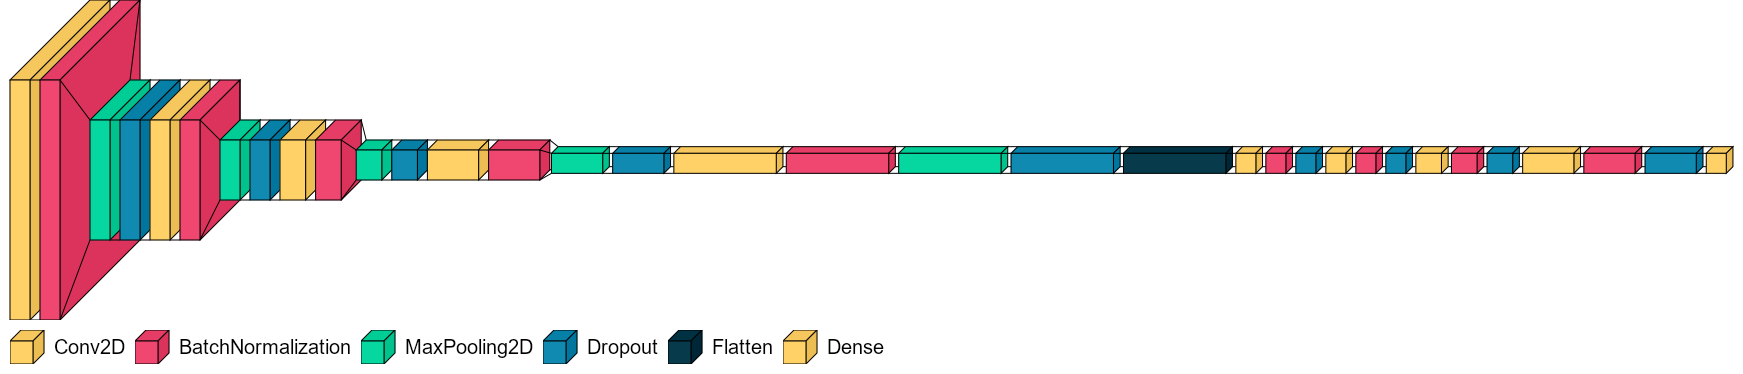

In [100]:
import visualkeras
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 20)
# Generate the layered view visualization
visualkeras.layered_view(model, legend=True, scale_xy=5, padding=10,font=font)


In [101]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_94 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_78 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_95 (Bat  (None, 24, 24, 128)    

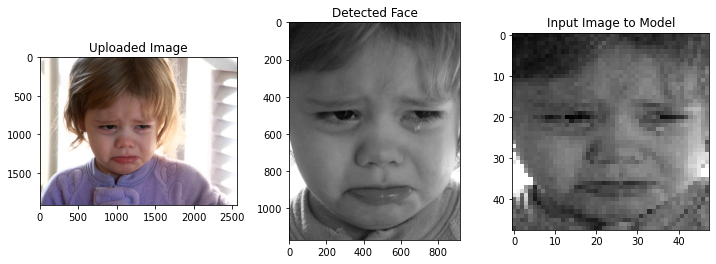

1/1 [==============================] - 0s 254ms/step
Predicted Emotion: Sad Person
Accuracy: 0.9999299


In [7]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
# Read and display the image
img = cv2.imread('sad3.jpg')
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Uploaded Image')
# Detect faces using RetinaFace
img_faces = RetinaFace.detect_faces(img)
# Check if any faces are detected
if len(img_faces) > 0  and isinstance(img_faces, dict):
    # Choose the first face detected
    face_index = list(img_faces.keys())[0]
    facial_parts = img_faces[face_index]
    recognize_face_area = facial_parts["facial_area"]
    face_img = img[recognize_face_area[1]:recognize_face_area[3], recognize_face_area[0]:recognize_face_area[2]]
    img_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    # Display the grayscale face image
    plt.subplot(1,3,2)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Detected Face')

    from keras.models import load_model
    import cv2
    import numpy as np
    # Load the emotion classification model
    model = load_model('models/model_4.h5')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    # Assume you have already performed face detection and obtained the grayscale face image in `face_gray`
    # Resize and normalize the face image
    img_resized = cv2.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0
    img_final = np.expand_dims(img_normalized, axis=0)
    plt.subplot(1,3,3)
    plt.imshow(img_resized,cmap="gray")
    plt.title('Input Image to Model')
    plt.show()
    # Make predictions
    predictions = model.predict(img_final)
    # Thresholding
    threshold = 0.5
    # Determine the predicted emotion class and accuracy
    if predictions[0] > threshold:
        predicted_class = 'Sad Person'
        accuracy = predictions[0][0]
    else:
        predicted_class = 'Happy Person'
        accuracy = 1 - predictions[0][0]

    print("Predicted Emotion:", predicted_class)
    print("Accuracy:", accuracy)
    
else:
    print('Unable to detect any face!! Try anther Image.')